In [10]:
#Name: Sushrut Deshpande
#RBT23CB002
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import seaborn as sns

In [11]:
df = sns.load_dataset('iris')

In [12]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3) 
}

Naive Bayes
Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



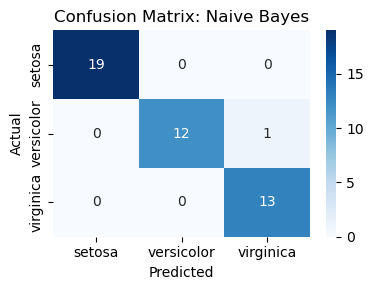

SVM
Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



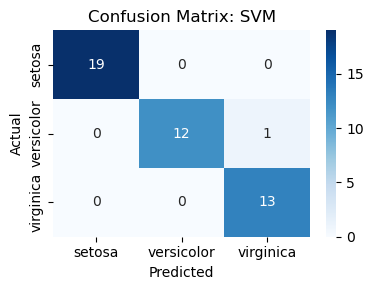

Decision Tree
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



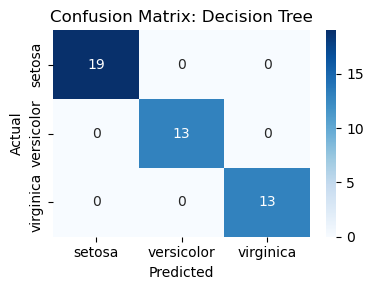

KNN
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



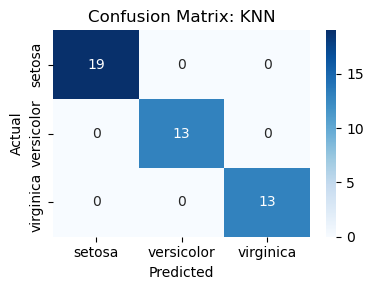

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

target_names = sorted(y.unique())
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(f'{name}')
  print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
  print(f'{classification_report(y_test, y_pred, target_names=target_names)}')
  plt.figure(figsize=(4, 3))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
  xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
  plt.title(f'Confusion Matrix: {name}')
  plt.xlabel('Predicted'); plt.ylabel('Actual')
  plt.tight_layout(); plt.show()